PART 1

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
train = pd.read_csv('home_price.csv')

In [2]:
#Converted sqft_basement to binary
import numpy as np
threshold = 0
train['sqft_basement'] = np.where(train['sqft_basement'] > threshold, 1,0)

In [3]:
y = train['price'].copy()   

In [4]:
X = train[['bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
          'sqft_basement','sqft_living15','sqft_lot15']].copy()

Variables to scale 
bedrooms, bathrooms, sqft_living, sqft_lot, floors,view,condition,grade,sqft_basement

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,  y_test = train_test_split(X , y , random_state = 0)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Calculation of regression coefficients

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

linear model coeff (w): [  183315.321068     309163.22917866     7510.8550867    671049.6927399
   262981.94327524   248469.59546604  1655582.94963907    68079.56234602
   542942.18545319  -238454.77618105]
linear model intercept (b): -823789.520
R-squared score (training): 0.566
R-squared score (test): 0.548


As you can see except sqft_lot15, all the variables have a postive correlation with the price of the houses. Hence we can interpret that with an increase of a unit in sqft_lot15, house price decreses by 238454 units.

In [8]:
train_predicted = linreg.predict(X_train_scaled)
test_predicted = linreg.predict(X_test_scaled)

Calculation of residual sum of squares

In [9]:
import numpy as np
RSS_train = np.sum((y_train - train_predicted) ** 2)
RSS_test = np.sum((y_test - test_predicted) ** 2)

In [10]:
print ("RSS_train: {:.0f}".format(RSS_train))
print ("RSS_test: {:.0f}".format(RSS_test))

RSS_train: 951975013866098
RSS_test: 324319932134703


PART 2 & 3


We will use different subsets i.e different set of features to check the effect on score of Linear Regression

Colums used for this poly fit are :
'bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
'sqft_basement','zipcode','sqft_living15','sqft_lot15'

FIRST SUBSET


In [11]:
X_truncated = X[ : 10000]
y_truncated = y[ : 10000]

We will check polynomial feature for different degrees and select the best option from it. Since this procedure increases computational complexity, we have truncated the dataset to 10,000 rows.

Degree: 1
R-squared score (training): 0.547
R-squared score (test): 0.540

Degree: 2
R-squared score (training): 0.698
R-squared score (test): 0.603

Degree: 3
R-squared score (training): 0.715
R-squared score (test): -0.002

Degree: 4
R-squared score (training): 0.642
R-squared score (test): -1.664



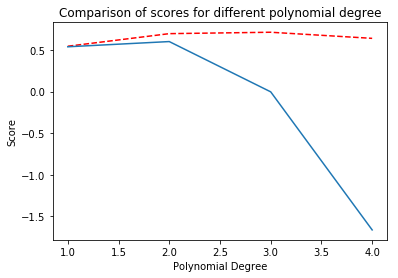

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
training_score = []
test_score = []
degree = []
for n in range (1,5):
    poly = PolynomialFeatures(n)
    X_poly = poly.fit_transform(X_truncated)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_truncated,
                                                   random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    print('Degree: {:.0f}'.format(n))
    print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))
    training_score.append(linreg.score(X_train, y_train))
    test_score.append(linreg.score(X_test, y_test))
    degree.append(n)

plt.plot(degree,training_score, 'r--', degree, test_score,'-')
plt.title('Comparison of scores for different polynomial degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.show()
    


Colums used for this poly fit are :
'bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
'sqft_basement','zipcode','sqft_living','sqft_lot'

SECOND SUBSET

In [13]:
X1 = train[['bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
          'sqft_basement','zipcode','sqft_living','sqft_lot']].copy()
y1 = train['price'].copy()   

In [14]:
X_truncated = X1[ : 10000]
y_truncated = y1[ : 10000]

Degree: 1
R-squared score (training): 0.614
R-squared score (test): 0.564

Degree: 2
R-squared score (training): 0.734
R-squared score (test): 0.645

Degree: 3
R-squared score (training): 0.736
R-squared score (test): 0.577

Degree: 4
R-squared score (training): 0.765
R-squared score (test): 0.346



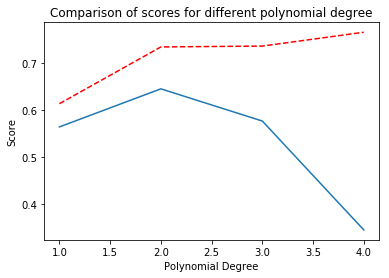

In [15]:
training_score2 = []
test_score2 = []
degree2 = []
for n in range (1,5):
    poly = PolynomialFeatures(n)
    X_poly = poly.fit_transform(X_truncated)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_truncated,
                                                   random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    print('Degree: {:.0f}'.format(n))
    print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))
    training_score2.append(linreg.score(X_train, y_train))
    test_score2.append(linreg.score(X_test, y_test))
    degree2.append(n)
    
plt.plot(degree2,training_score2, 'r--', degree2, test_score2,'-')
plt.title('Comparison of scores for different polynomial degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.show()

Columns used for this poly fit are :
'bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
 'sqft_basement','lat','long','sqft_living','sqft_lot'
 
 THIRD SUBSET

In [16]:
X2 = train[['bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
          'sqft_basement','lat','long','sqft_living','sqft_lot','yr_built']].copy()
y2 = train['price'].copy() 

In [17]:
X_truncated = X2[ : 10000]
y_truncated = y2[ : 10000]

Degree: 1
R-squared score (training): 0.696
R-squared score (test): 0.660

Degree: 2
R-squared score (training): 0.825
R-squared score (test): 0.748

Degree: 3
R-squared score (training): 0.854
R-squared score (test): 0.696

Degree: 4
R-squared score (training): 0.796
R-squared score (test): -0.094



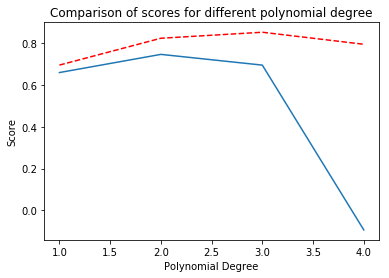

In [18]:
training_score = []
test_score = []
degree = []
for n in range (1,5):
    poly = PolynomialFeatures(n)
    X_poly = poly.fit_transform(X_truncated)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_truncated,
                                                   random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    print('Degree: {:.0f}'.format(n))
    print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))
    training_score.append(linreg.score(X_train, y_train))
    test_score.append(linreg.score(X_test, y_test))
    degree.append(n)
    
plt.plot(degree,training_score, 'r--', degree, test_score,'-')
plt.title('Comparison of scores for different polynomial degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.show()

From 3 different subsets, data labelled X2 and y2 give the best R-squared score for training and test data, hence we will go forward with 3rd subset of data.

We get the best R-squared score with degree = 2 in all the three subsets of data. Hence we will apply polynomial on the entire dataset with degree =2.

We will also add Zip code to the dataset using hot encoding.

FINAL SELECTION 
1.) Polynomial degree (n = 2)
2.) train data: X2, test data: y2

In [19]:
X2 = train[['bedrooms','bathrooms','floors','waterfront','view','condition','grade', \
          'sqft_basement','zipcode','lat','long','sqft_living','sqft_lot']].copy()
y2 = train['price'].copy() 

Now that we have decided the polynomial degree and the features to be used, we will add the zipcode to the dataset and also use the entire dataset.

We will convert the zip code to dummy variables using LabelBinarizer

In [20]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
zip_1hot = encoder.fit_transform(X2['zipcode'])
zip_1hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
test = pd.DataFrame(zip_1hot)
X_final = pd.concat([X2, test], axis = 1 , join_axes = [X2.index])
#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])

Final model fit for Part 2

In [23]:
    degree = 2
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_final)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y2,random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    print('Degree: {:.0f}'.format(degree))
    print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))    

Degree: 2
R-squared score (training): 0.921
R-squared score (test): 0.896



Now we will apply Lasso on the transformed dataset for different values of alpha.

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.01
Features kept: 1109, r-squared training: 0.9104712, r-squared test: 0.8839561

Alpha = 0.10
Features kept: 1107, r-squared training: 0.9104705, r-squared test: 0.8844573

Alpha = 50.00
Features kept: 566, r-squared training: 0.9059456, r-squared test: 0.8908380

Alpha = 150.00
Features kept: 364, r-squared training: 0.9002504, r-squared test: 0.8914478

Alpha = 200.00
Features kept: 329, r-squared training: 0.8988368, r-squared test: 0.8911046

Alpha = 500.00
Features kept: 282, r-squared training: 0.8944345, r-squared test: 0.8886840



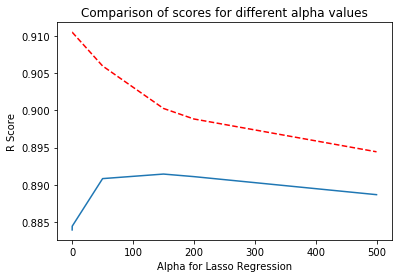

In [51]:
from sklearn.linear_model import Lasso
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

training_score=[]
test_score=[]
degree=[]
for alpha in [0.1, 50,150,200,500]:
    linlasso = Lasso(alpha).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    degree.append(alpha)
    training_score.append(r2_train)
    test_score.append(r2_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.7f}, \
r-squared test: {:.7f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    
plt.plot(degree,training_score, 'r--', degree, test_score,'-')
plt.title('Comparison of scores for different alpha values')
plt.xlabel('Alpha for Lasso Regression')
plt.ylabel('R Score')
plt.show()

Alpha = 150 gives us the least features with optimum r-squared scores for training and test. Hence we will use alpha = 150 to retrieve the significant features.

In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=150.0).fit(X_train, y_train)

print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('LIST OF SIGNIFICANT FEATURES:')

for e in sorted (list(zip(list(X2), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Non-zero features: 364
R-squared score (training): 0.900
R-squared score (test): 0.891

LIST OF SIGNIFICANT FEATURES:
	sqft_basement, 57543.314
	bathrooms, 17496.151
	lat, -1025.972
	sqft_lot, 196.321


Now we will apply Ridge Regression for different values of alpha to check the R-squared scores.

Ridge regression: effect of alpha regularization parameter

Alpha = 0.10
num abs(coeff) > 1.0: 931, r-squared training: 0.92, r-squared test: 0.89

Alpha = 10.00
num abs(coeff) > 1.0: 940, r-squared training: 0.91, r-squared test: 0.89

Alpha = 50.00
num abs(coeff) > 1.0: 920, r-squared training: 0.90, r-squared test: 0.89

Alpha = 150.00
num abs(coeff) > 1.0: 911, r-squared training: 0.90, r-squared test: 0.89

Alpha = 1000.00
num abs(coeff) > 1.0: 899, r-squared training: 0.90, r-squared test: 0.89



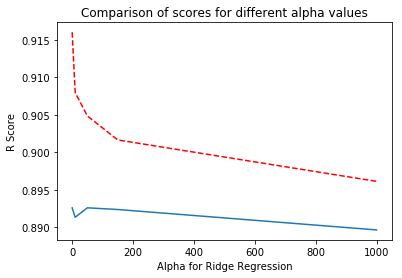

In [53]:
from sklearn.linear_model import Ridge
print('Ridge regression: effect of alpha regularization parameter\n')
training_score = []
test_score=[]
degree = []
for this_alpha in [0.1,10,50,150,1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    training_score.append(r2_train)
    test_score.append(r2_test)
    degree.append(this_alpha)
    
plt.plot(degree,training_score, 'r--', degree, test_score,'-')
plt.title('Comparison of scores for different alpha values')
plt.xlabel('Alpha for Ridge Regression')
plt.ylabel('R Score')
plt.show()

Cross Validation to choose best L1 and L2

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

for n in [0.1,50,150,1000]:
    clf = Lasso(alpha= n)
    X = X_final.as_matrix()
    y = y2.as_matrix()
    cv_scores = cross_val_score(clf, X, y, cv=6)
    print('Cross-validation scores (6-fold):', cv_scores)
    print('Mean cross-validation score (6-fold): {:.7f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (6-fold): [ 0.79991355  0.7995355   0.76930094  0.80920731  0.81961444  0.81476238]
Mean cross-validation score (6-fold): 0.8020557
Cross-validation scores (6-fold): [ 0.79965854  0.79936011  0.76874437  0.80934694  0.82004906  0.81413572]
Mean cross-validation score (6-fold): 0.8018825
Cross-validation scores (6-fold): [ 0.79811317  0.79773655  0.76708035  0.80907826  0.8207779   0.81236099]
Mean cross-validation score (6-fold): 0.8008579
Cross-validation scores (6-fold): [ 0.76537649  0.76030981  0.73193024  0.77842353  0.79623435  0.77929873]
Mean cross-validation score (6-fold): 0.7685955


When running Lasso with Cross Validation, we can see that the optimum value of alpha is 0.01.
Now we will run Cross Validation with different valus of alpha on Ridge.

In [45]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

for n in [0.1,10,50, 100, 1000]:
    clf = Ridge(alpha= n)
    X = X_final.as_matrix()
    y = y2.as_matrix()
    cv_scores = cross_val_score(clf, X, y, cv=6)
    print('Cross-validation scores (6-fold):', cv_scores)
    print('Mean cross-validation score (6-fold): {:.7f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (6-fold): [ 0.7998941   0.79952541  0.76929533  0.80924913  0.81966163  0.81475416]
Mean cross-validation score (6-fold): 0.8020633
Cross-validation scores (6-fold): [ 0.79744303  0.79656433  0.76823768  0.81055279  0.82180354  0.81211901]
Mean cross-validation score (6-fold): 0.8011201
Cross-validation scores (6-fold): [ 0.78552982  0.77992021  0.75826701  0.79971706  0.81347553  0.79729171]
Mean cross-validation score (6-fold): 0.7890336
Cross-validation scores (6-fold): [ 0.77082756  0.76169878  0.74451209  0.78359314  0.79896975  0.78112811]
Mean cross-validation score (6-fold): 0.7734549
Cross-validation scores (6-fold): [ 0.66678487  0.65165917  0.64768204  0.67423714  0.68932787  0.68142561]
Mean cross-validation score (6-fold): 0.6685195


With alpha = 0.01, we get the best Cross Validation score.

PART 4

Neighbors: 1
R-squared train score: 0.998
R-squared test score: 0.202
[  288000.  1035000.   475000. ...,   400000.   354000.   680000.]
Neighbors: 2
R-squared train score: 0.802
R-squared test score: 0.371
[ 404750.  887250.  360000. ...,  350000.  349000.  627400.]
Neighbors: 3
R-squared train score: 0.728
R-squared test score: 0.439
[ 459833.33333333  838166.66666667  397000.         ...,  695000.          315500.
  559933.33333333]
Neighbors: 4
R-squared train score: 0.688
R-squared test score: 0.470
[ 468625.  775375.  400250. ...,  638250.  331525.  497450.]
Neighbors: 5
R-squared train score: 0.664
R-squared test score: 0.494
[ 483700.   902052.4  474200.  ...,  637600.   341220.   489560. ]
Neighbors: 6
R-squared train score: 0.647
R-squared test score: 0.497
[ 459916.66666667  859210.33333333  473500.         ...,  663416.66666667
  334350.          460133.33333333]
Neighbors: 7
R-squared train score: 0.634
R-squared test score: 0.499
[ 426900.          875751.71428571  470142

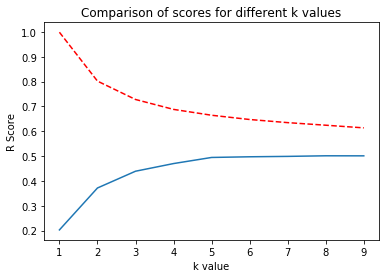

In [54]:
from sklearn.neighbors import KNeighborsRegressor
training_score=[]
test_score=[]
degree=[]
for n in range(1,10):
    knnreg = KNeighborsRegressor(n_neighbors = n).fit(X_train, y_train)
    print('Neighbors: {:.0f}'.format(n))
    print('R-squared train score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))
    print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
    print(knnreg.predict(X_test))
    degree.append(n)
    training_score.append(knnreg.score(X_train,y_train))
    test_score.append(knnreg.score(X_test,y_test))
    
plt.plot(degree,training_score, 'r--', degree, test_score,'-')
plt.title('Comparison of scores for different k values')
plt.xlabel('k value')
plt.ylabel('R Score')
plt.show()    